In [1]:
# This script generates a seaborn clustermap with a colorbar indicating metadata about the samples
## This script was written in Python 3.5.2
## This script was modified from http://stackoverflow.com/questions/27988846/how-to-express-classes-on-the-axis-of-a-heatmap-in-seaborn/27992943
%matplotlib notebook
import pandas as pd
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#Bring in toy data 
from sklearn.datasets import load_iris
iris = load_iris()
##load Iris data as one df of the feature data and one as the class data
### This is so we can maintain the index labels for the cluster map color bar assignment
X = pd.DataFrame(data=iris.data)
y = pd.DataFrame(data={'Class':iris.target})

<IPython.core.display.Javascript object>


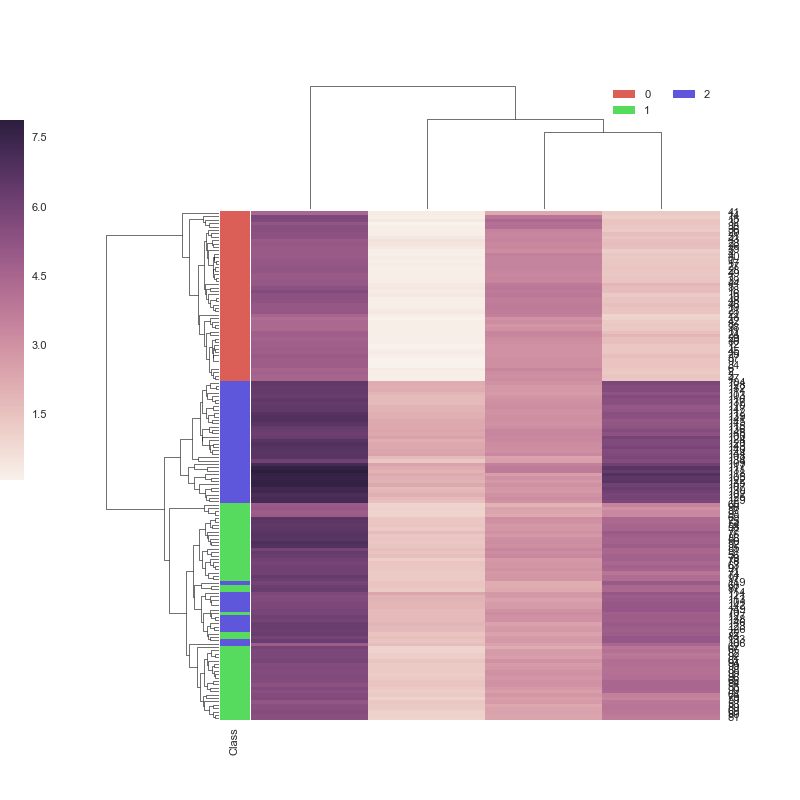

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [3]:

#if you want a color strip to show you different info about the columns/rows
#group is deferentiating data between samples you are clustering can be strings or ints
##need to make sure group has no NaNs
group=y['Class']
network_pal = sns.color_palette("hls", 3)
## If you are working with strings change network_lt to dict(zip(map(str,....
network_lut = dict(zip(map(int, group.unique()), network_pal))
network_colors = pd.Series(group).map(network_lut)

#if input data has many features such as an OTU table you will want to:
## set xticklabels = False and linewidths=0
## if you have additional discriminating data for the columns you can also define col_colors=network_colors
## The metric used here can also me set using scipy.spatial.distance.pdist metrics https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
sns_plot = sns.clustermap(X,linewidths=0,row_colors=network_colors,metric='euclidean',xticklabels=False)
#label with the discriminating data and add legend
for label in group.unique():
    sns_plot.ax_col_dendrogram.bar(0,0,color=network_lut[label],label=label, linewidth=0)
sns_plot.ax_col_dendrogram.legend(loc="upper right", ncol=2)
sns_plot.cax.set_position([0, .4,.03,.45])
plt.setp(sns_plot.ax_heatmap.yaxis.get_majorticklabels(), rotation=0) 



